In [26]:
# automatically reload the package when it is modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from mtr.models import model as model_utils
from mtr.config import cfg, cfg_from_list, cfg_from_yaml_file, log_config_to_file
from mtr.datasets.waymo.waymo_dataset import WaymoDataset
from tools.mtr_env import BatchMTREnv
from tools.mtr_inference import MTRInference
import numpy as np

cfg_file = 'tools/cfgs/waymo/bc+10_percent_data.yaml'
ckpt_path = 'output/bc/epoch=2-step=4602.ckpt'
cfg = cfg_from_yaml_file(cfg_file, cfg)

dataset = WaymoDataset(cfg.DATA_CONFIG, training=False)
model = model_utils.MotionTransformer(cfg.MODEL)
mtr_inference = MTRInference(cfg_file, ckpt_path)
env = BatchMTREnv(1, dataset)


=========== MTR Inference ===========


In [34]:
batch_scene_data = env.batch_scene_data
batch_pred_dicts = mtr_inference.inference(batch_scene_data, False)
pred_ctrl = batch_pred_dicts['pred_ctrl']

([<Figure size 800x800 with 2 Axes>],
 [<AxesSubplot: title={'center': 'Scene 2bab7296b543f363 at 1.0 seconds'}>])

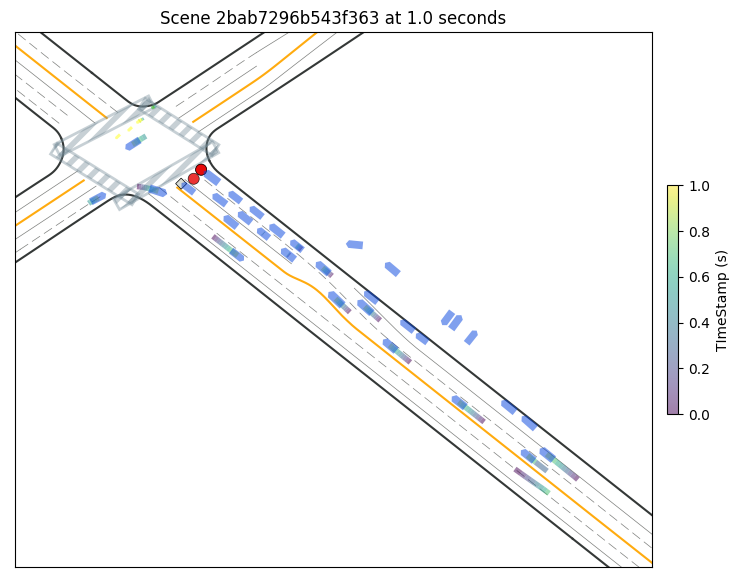

In [29]:
env.visualize(auto_zoom=20)

In [30]:
fig, ax = env.visualize(True)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 fig, ax = env.visualize(True)                                                                │
│   2                                                                                              │
│                                                                                                  │
│ /home/zixuzhang/Documents/Git/MTR/tools/mtr_env.py:52 in visualize                               │
│                                                                                                  │
│    49 │   │   ax_list = []                                                                       │
│    50 │   │   fig_list = []                                                                      │
│    51 │   │   for i in index:                                                                    │
│ ❱  52 │   │   │   fig, ax = self.envs_list[i].visualize(auto_zoom = auto_zoom)                   │
│    53 │   │   │   ax_list.append(ax)                                                             │
│    54 │   │   │   fig_list.append(fig)                                                           │
│    55 │   │   return fig_list, ax_list                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: list index out of range